Exercise 1:

$$

Exercise 2:

$$
\lVert A \rVert = \sqrt{\sum_{j=1}^{n}(\sigma_j)^2}
$$

One can prove this claim, by using the cyclic property of the Trace. It is well known, that one can define the l2 norm as the Trace of the matrix, due the similarity between Frobenius and l2 norms, one can extend this property to the Frobenius too.

$$
(\lVert A \rVert)_F = \sqrt{Tr(A^{*}A)}=\sqrt{Tr(VDU^{*}UDV^{*})}= \sqrt{Tr(D^2)}= \sqrt{\sum_{j=1}^{n}(\sigma_j)^2}
$$

Where $\sigma$ are the singular values of D. $A=UDV^{*}$.

Exercise 3:
$$
 \langle  \;x ,y \; \rangle \ =(\lVert x,y \rVert)_2 = y^{T}x
$$

By inspecting the above properties one can first conclude that in order for $y^{T}x=y^{T}Mx$ then $M=I$, where $I$ is the identity matrix. However given the characteristics of matrices, there exists a stronger condition for M such that the result is not affected. Extending from the identity matrix, we know $I$ is a symmetric matrix with positive eigenvalues, given so one can claim that $M$ must be a symetric matrix, where upper triangular matrix is equal to lower triangular matrix, and which eigenvalues are positive and real entrices. One concludes M must be:

- Symmetric
- Posivite define

Exercise 4:


In [1]:
import numpy as np
from numpy import linalg 
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy.optimize import minimize

y = np.linspace(-2,2,401) # spatial coordinate
Ny = np.size(y)

amp1 = 1
y01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
y02 = -0.5
sigmay2 = 0.3

dt = 0.1
Nt = 101
tend = dt*(Nt-1)
t = np.linspace(0,tend,Nt) # time

omega1 = 1.3
omega2 = 4.1

v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1**2))
v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))

X = np.zeros([Ny,Nt],dtype=complex)
for tt in range(Nt):
    X[:,tt] = v1*np.exp(1j*omega1*t[tt])+v2*np.exp(1j*omega2*t[tt]) 

Reduced DMD code for exercise 6 of HW 1. The main complexity of this code relies on how the SVD is performed in python. Opposite to matlab, the SVD decomposition right eigenvector is not conjugated when outputed by the SVD but in its natural form. 

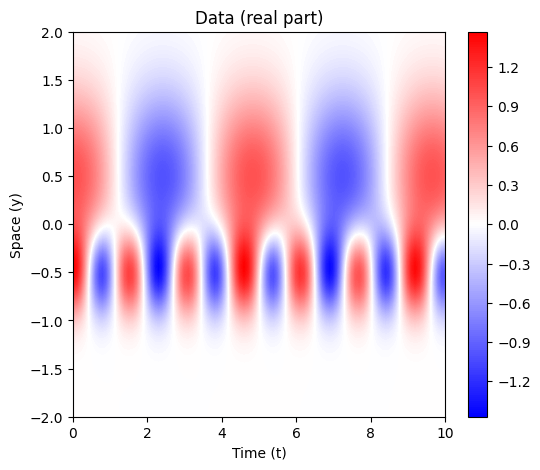

In [2]:
T, Y = np.meshgrid(t, y)
fig, r = plt.subplots(figsize=(6,5))
plot_data=r.contourf(T,Y,np.real(X),200,cmap='bwr')
fig.colorbar(plot_data, ax=r)
r.set_title('Data (real part)')
r.set_ylabel('Space (y)')
r.set_xlabel('Time (t)')
plt.show()

In [3]:
r=2

# -------------------- We define matrices

X1=X[:,:-1]
X2=X[:,1:]

# -------------------- SVD - Reduce rank 

U, S, VT = np.linalg.svd(X1,full_matrices=0)
   
Ur = U[:,:r]
Sr = np.diag(S[:r])
VTr = VT[:r,:]

# -------------------- Build Atilde 

Atilde = np.linalg.solve(Sr.T,(np.conjugate(Ur.T) @ X2 @ np.conjugate(VTr.T) ).T).T

Lambda, W = np.linalg.eig(Atilde) 

# -------------------- Build DMD modes

Phi = X2 @ np.linalg.solve(Sr.T,np.conjugate(VTr)).T @ W     

# -------------------- Build amplitude

alpha1 = Sr @ np.conjugate(VTr[:,0])
b = np.linalg.solve(W @ np.diag(Lambda),alpha1)

/tmp/ipykernel_4486/2643247238.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  time_dynamics[:,iter]=b * np.exp(omega * t[iter])


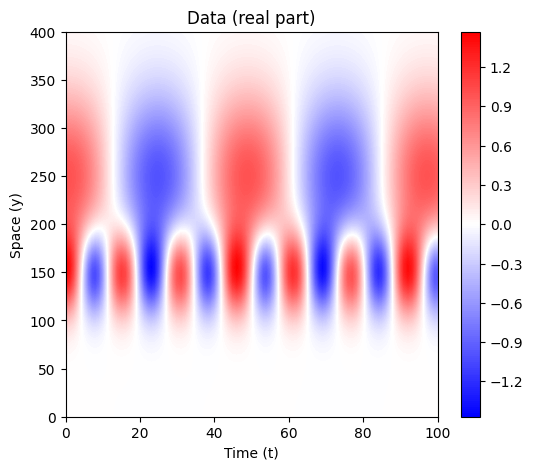

In [4]:
dt=t[1]-t[0]
omega=np.log(Lambda)/dt

time_dynamics=np.zeros(shape=(r,len(t)))
for iter in range(len(t)):
    time_dynamics[:,iter]=b * np.exp(omega * t[iter])
X_dmd=Phi@time_dynamics

T, Y = np.meshgrid(t, y)
fig, i = plt.subplots(figsize=(6,5))
plot_dataa=i.contourf(np.real(X_dmd),200,cmap='bwr')
fig.colorbar(plot_dataa, ax=i)
i.set_title('Data (real part)')
i.set_ylabel('Space (y)')
i.set_xlabel('Time (t)')
plt.show()